THEORY QUESTIONS

Question 1: What does R-squared represent in a regression model?
Answer: It indicates the proportion of variance in the dependent variable explained by the independent variables.

Question 2: What are the assumptions of linear regression?
Answer: Linearity, independence, homoscedasticity, normality of residuals, and no multicollinearity.

Question 3: What is the difference between R-squared and Adjusted R-squared?
Answer: Adjusted R-squared penalizes for adding irrelevant predictors; R-squared does not.

Question 4: Why do we use Mean Squared Error (MSE)?
Answer: It penalizes large errors more, helping to optimize models during training.

Question 5: What does an Adjusted R-squared value of 0.85 indicate?
Answer: 85% of the variance is explained by the model, adjusted for the number of predictors.

Question 6: How do we check for normality of residuals in linear regression?
Answer: Use Q-Q plots or histograms of residuals.

Question 7: What is multicollinearity, and how does it impact regression?
Answer: It occurs when predictors are highly correlated, inflating variances of coefficients.

Question 8: What is Mean Absolute Error (MAE)?
Answer: The average of absolute differences between predicted and actual values.

Question 9: What are the benefits of using an ML pipeline?
Answer: Ensures reproducibility, cleaner code, and streamlined preprocessing + modeling.

Question 10: Why is RMSE considered more interpretable than MSE?
Answer: RMSE is in the same units as the target variable, unlike MSE.

Question 11: What is pickling in Python, and how is it useful in ML?
Answer: It serializes models to files, allowing easy storage and reuse.

Question 12: What does a high R-squared value mean?
Answer: A large portion of variance is explained by the model.

Question 13: What happens if linear regression assumptions are violated?
Answer: Model predictions and interpretations may become unreliable.

Question 14: How can we address multicollinearity in regression?
Answer: Use techniques like VIF analysis, PCA, or remove correlated predictors.

Question 15: How can feature selection improve model performance in regression analysis?
Answer: Reduces overfitting, improves accuracy, and makes the model simpler.

Question 16: How is Adjusted R-squared calculated?
Answer:
Adjusted R² = 1 - [(1 - R²)(n - 1)/(n - p - 1)]
Where n = observations, p = predictors.

Question 17: Why is MSE sensitive to outliers?
Answer: Errors are squared, so larger errors have a disproportionately higher impact.

Question 18: What is the role of homoscedasticity in linear regression?
Answer: It ensures constant variance of errors, key for valid inference.

Question 19: What is Root Mean Squared Error (RMSE)?
Answer: The square root of MSE, representing average prediction error in target units.

Question 20: Why is pickling considered risky?
Answer: It can execute arbitrary code during loading, posing security risks.

Question 21: What alternatives exist to pickling for saving ML models?
Answer: joblib, ONNX, or exporting as JSON + weights.

Question 22: What is heteroscedasticity, and why is it a problem?
Answer: Non-constant variance of errors; it invalidates confidence intervals and tests.

Question 23: How can interaction terms enhance a regression model's predictive power?
Answer: They capture combined effects of variables not explained by individual predictors.



PRACTICAL QUESTIONS

1. Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model using Seaborn's "diamonds" dataset.

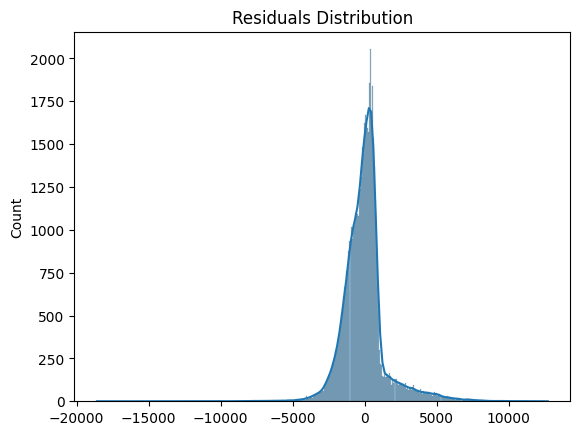

In [11]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = sns.load_dataset('diamonds').dropna()
X = sm.add_constant(df[['carat']])
y = df['price']

model = sm.OLS(y, X).fit()
residuals = model.resid

sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()


Question 2:
Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) for a linear regression model.

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)


MSE: 0.375
MAE: 0.5
RMSE: 0.6123724356957945


Question 3:
Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.

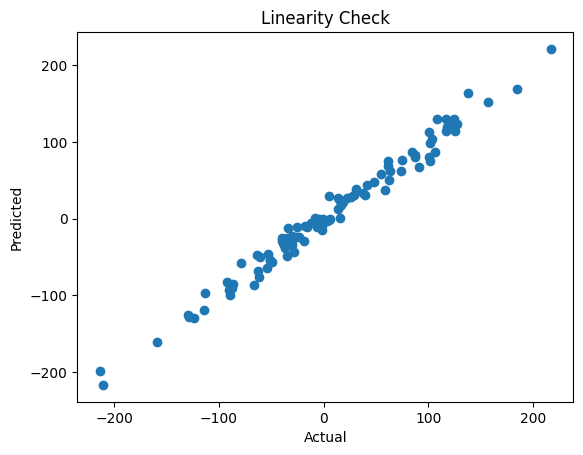

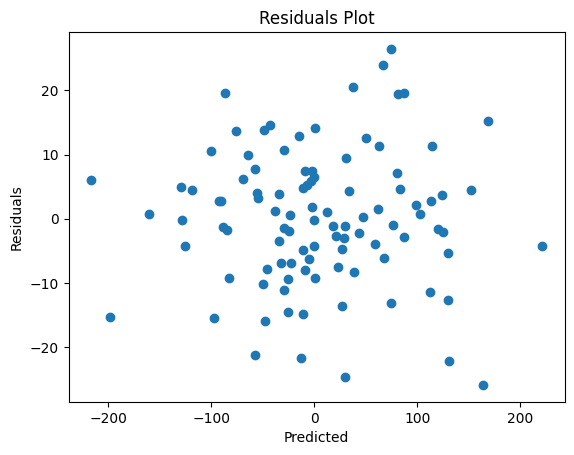

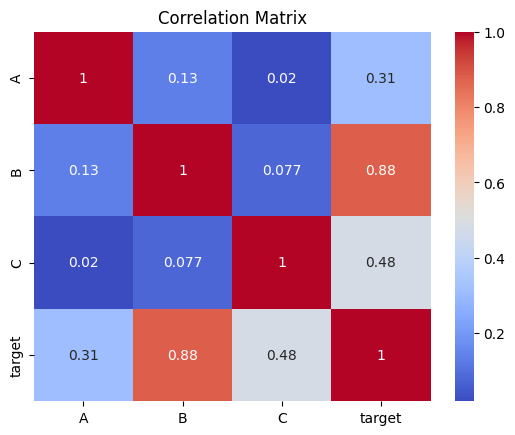

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

X, y = make_regression(n_features=3, noise=10)
df = pd.DataFrame(X, columns=['A', 'B', 'C'])
df['target'] = y

model = LinearRegression().fit(X, y)
predictions = model.predict(X)
residuals = y - predictions

# Linearity
plt.scatter(y, predictions)
plt.title("Linearity Check")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# Homoscedasticity
plt.scatter(predictions, residuals)
plt.title("Residuals Plot")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Multicollinearity
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


Question 4:
Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the performance of different regression models.

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X, y = make_regression(n_features=4, noise=15)
X_train, X_test, y_train, y_test = train_test_split(X, y)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)
preds = pipeline.predict(X_test)

print("R² Score:", r2_score(y_test, preds))


R² Score: 0.9768677921792973


Question 5:
Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and R-squared score.

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 3, 2, 3, 5])
model = LinearRegression().fit(X, y)

print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)
print("R² Score:", r2_score(y, model.predict(X)))


Coefficient: 0.7999999999999999
Intercept: 0.3999999999999999
R² Score: 0.7272727272727273


Question 6:
Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using simple linear regression and visualizes the results.

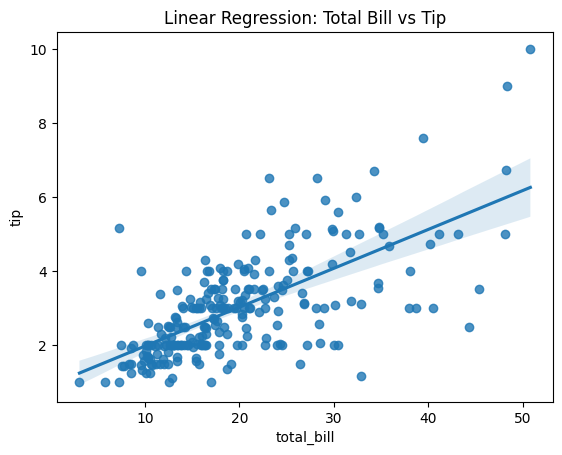

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

df = sns.load_dataset('tips')
X = df[['total_bill']]
y = df['tip']
model = LinearRegression().fit(X, y)

sns.regplot(x='total_bill', y='tip', data=df)
plt.title('Linear Regression: Total Bill vs Tip')
plt.show()


Question 7:
Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the model to predict new values and plot the data points along with the regression line.



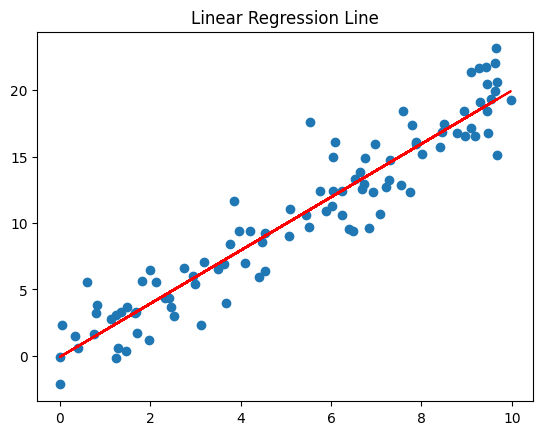

In [17]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

X = np.random.rand(100, 1) * 10
y = 2 * X.squeeze() + np.random.randn(100) * 2
model = LinearRegression().fit(X, y)

plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.title("Linear Regression Line")
plt.show()


Question 8:
Write a Python script that pickles a trained linear regression model and saves it to a file.

In [18]:
import pickle
from sklearn.linear_model import LinearRegression
import numpy as np

X = np.random.rand(50, 1)
y = 3 * X.squeeze() + np.random.randn(50)
model = LinearRegression().fit(X, y)

with open('linear_model.pkl', 'wb') as file:
    pickle.dump(model, file)


Question 9:
Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the regression curve.

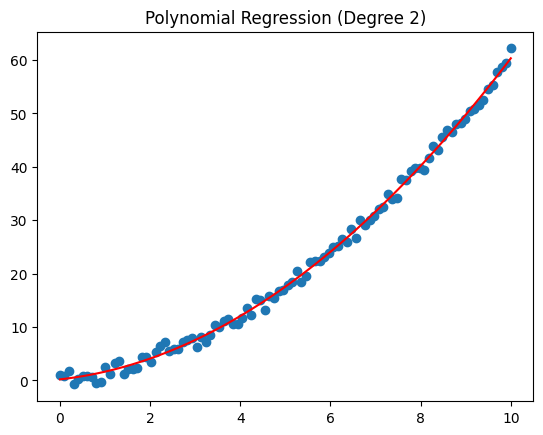

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 0.5 * X.squeeze()**2 + X.squeeze() + np.random.randn(100)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression().fit(X_poly, y)
plt.scatter(X, y)
plt.plot(X, model.predict(X_poly), color='red')
plt.title("Polynomial Regression (Degree 2)")
plt.show()


Question 10:
Generate synthetic data for simple linear regression and fit the model. Print coefficient and intercept.

In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.random.rand(50, 1) * 10
y = 4 * X.squeeze() + np.random.randn(50)
model = LinearRegression().fit(X, y)

print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)


Coefficient: 4.019659541762252
Intercept: -0.09045379671697518


Question 11:
Fit polynomial regression models of different degrees to a synthetic dataset and compare performance.

In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X.squeeze()**2 + np.random.randn(100)

for degree in [1, 2, 3]:
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    score = r2_score(y, model.predict(X_poly))
    print(f"Degree {degree} R² Score:", score)


Degree 1 R² Score: 0.9347294952505549
Degree 2 R² Score: 0.9998227675541215
Degree 3 R² Score: 0.9998229462487064


Question 12:
Fit a simple linear regression model with two features and print coefficients, intercept, and R-squared score.

In [22]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = np.random.rand(100, 2)
y = 3 * X[:, 0] + 2 * X[:, 1] + np.random.randn(100)
model = LinearRegression().fit(X, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", r2_score(y, model.predict(X)))


Coefficients: [2.90577838 2.18109434]
Intercept: 0.10269704811936009
R² Score: 0.48927182981588124


Question 13:
Generate synthetic data, fit a linear regression model, and visualize the regression line along with data points.

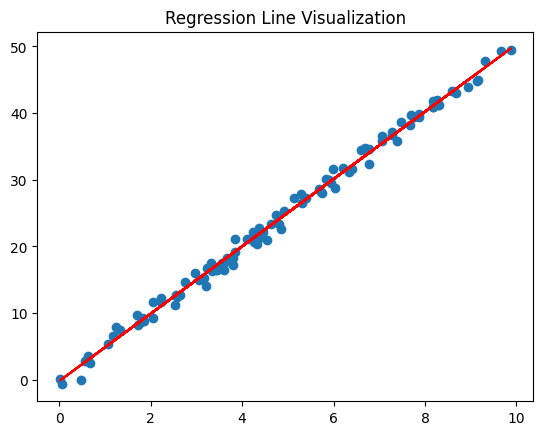

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.random.rand(100, 1) * 10
y = 5 * X.squeeze() + np.random.randn(100)
model = LinearRegression().fit(X, y)

plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.title("Regression Line Visualization")
plt.show()


Question 14:
Use the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset with multiple features.

In [24]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import make_regression

X, _ = make_regression(n_features=4, noise=5)
df = pd.DataFrame(X, columns=['A', 'B', 'C', 'D'])

vif = pd.DataFrame()
vif["Feature"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
print(vif)


  Feature       VIF
0       A  1.039640
1       B  1.058963
2       C  1.033315
3       D  1.082643


Question 15:
Generate synthetic data for a polynomial relationship (degree 4), fit a polynomial regression model, and plot the regression curve.

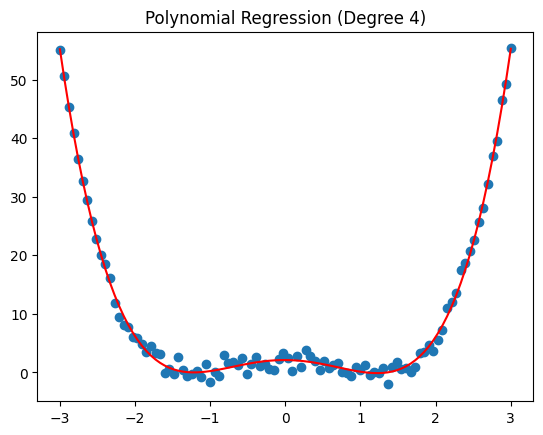

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = X.squeeze()**4 - 3*X.squeeze()**2 + 2 + np.random.randn(100)

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

model = LinearRegression().fit(X_poly, y)
plt.scatter(X, y)
plt.plot(X, model.predict(X_poly), color='red')
plt.title("Polynomial Regression (Degree 4)")
plt.show()


Question 16:
Create a machine learning pipeline with data standardization and a multiple linear regression model. Print the R-squared score.

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X, y = make_regression(n_features=3, noise=10)
X_train, X_test, y_train, y_test = train_test_split(X, y)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
pipeline.fit(X_train, y_train)
print("R² Score:", r2_score(y_test, pipeline.predict(X_test)))


R² Score: 0.9967589052907788


Question 17:
Perform polynomial regression (degree 3) on a synthetic dataset and plot the regression curve.

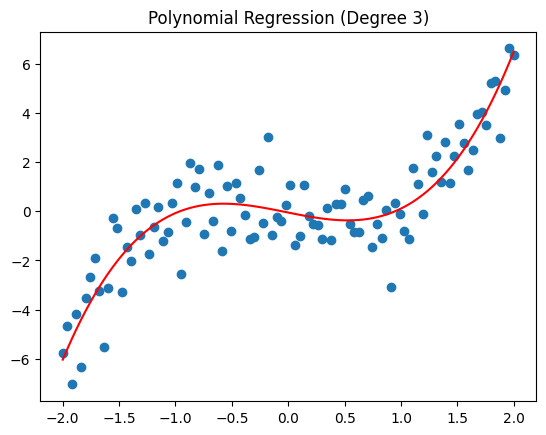

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = np.linspace(-2, 2, 100).reshape(-1, 1)
y = X.squeeze()**3 - X.squeeze() + np.random.randn(100)

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)

plt.scatter(X, y)
plt.plot(X, model.predict(X_poly), color='red')
plt.title("Polynomial Regression (Degree 3)")
plt.show()


Question 18:
Perform multiple linear regression on a synthetic dataset with 5 features. Print the R-squared score and model coefficients.

In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = np.random.rand(100, 5)
y = X @ np.array([1.5, -2, 3, 0.5, 2]) + np.random.randn(100)
model = LinearRegression().fit(X, y)

print("Coefficients:", model.coef_)
print("R² Score:", r2_score(y, model.predict(X)))


Coefficients: [ 1.20504178 -2.51307462  2.72425641  0.12552346  1.94330209]
R² Score: 0.6504314048397692


Question 19:
Generate synthetic data for linear regression, fit a model, and visualize the data points along with the regression line.

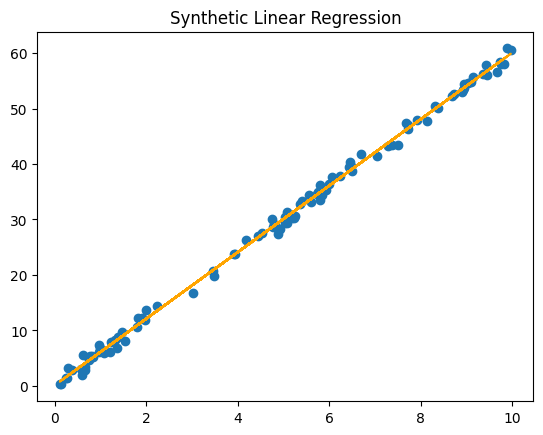

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.random.rand(100, 1) * 10
y = 6 * X.squeeze() + np.random.randn(100)
model = LinearRegression().fit(X, y)

plt.scatter(X, y)
plt.plot(X, model.predict(X), color='orange')
plt.title("Synthetic Linear Regression")
plt.show()


Question 20:
Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's R-squared score and coefficients.

In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = np.random.rand(100, 3)
y = 2 * X[:, 0] + 3 * X[:, 1] - X[:, 2] + np.random.randn(100)
model = LinearRegression().fit(X, y)

print("R² Score:", r2_score(y, model.predict(X)))
print("Coefficients:", model.coef_)


R² Score: 0.5893417961077381
Coefficients: [ 1.91810603  3.04379574 -0.37548276]


Question 21:
Demonstrate how to serialize and deserialize ML models using joblib instead of pickling.

In [31]:
from sklearn.linear_model import LinearRegression
import joblib
import numpy as np

X = np.random.rand(30, 1)
y = 5 * X.squeeze() + np.random.randn(30)
model = LinearRegression().fit(X, y)

joblib.dump(model, 'model.joblib')
loaded_model = joblib.load('model.joblib')
print("Loaded model coefficient:", loaded_model.coef_)


Loaded model coefficient: [5.49613718]


Question 22:
Perform linear regression with categorical features using one-hot encoding on the Seaborn 'tips' dataset.

In [32]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = sns.load_dataset('tips')
df = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

X = df.drop('tip', axis=1)
y = df['tip']

model = LinearRegression().fit(X, y)
print("R² Score:", model.score(X, y))


R² Score: 0.47007812322060794


Question 23:
Compare Ridge Regression with Linear Regression on a synthetic dataset and print coefficients and R-squared score.

In [33]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge

X = np.random.rand(100, 3)
y = 3 * X[:, 0] - 2 * X[:, 1] + X[:, 2] + np.random.randn(100)

lr = LinearRegression().fit(X, y)
ridge = Ridge(alpha=1).fit(X, y)

print("Linear Coefficients:", lr.coef_)
print("Ridge Coefficients:", ridge.coef_)
print("Linear R²:", lr.score(X, y))
print("Ridge R²:", ridge.score(X, y))


Linear Coefficients: [ 3.37194464 -2.00994438  0.91253739]
Ridge Coefficients: [ 3.03868727 -1.82012735  0.84063224]
Linear R²: 0.6252608265345279
Ridge R²: 0.6194280859347612


Question 24:
Use cross-validation to evaluate a Linear Regression model on a synthetic dataset.

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=2, noise=10)
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Cross-Validation R² Scores:", scores)
print("Average R²:", scores.mean())


Cross-Validation R² Scores: [0.96859692 0.97547446 0.98359892 0.99026457 0.98374031]
Average R²: 0.9803350355938761


Question 25:
Compare polynomial regression models of different degrees and print the R-squared score for each.

In [35]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

X = np.linspace(0, 5, 100).reshape(-1, 1)
y = X.squeeze()**3 - 2 * X.squeeze()**2 + X.squeeze() + np.random.randn(100)

for degree in [1, 2, 3, 4]:
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    print(f"Degree {degree} R² Score:", r2_score(y, model.predict(X_poly)))


Degree 1 R² Score: 0.7695953262737687
Degree 2 R² Score: 0.9851699409383684
Degree 3 R² Score: 0.9982928873357505
Degree 4 R² Score: 0.998345176651294
